# Functions & libs

In [51]:
import os 
import duckdb_query_graph
import json
import csv
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import math

cwd = os.getcwd()

In [52]:
# function: clean the data
# drop useless columns, rename column names, move 'job_query' column to the first, sort by 'job_query'
def clean_df(df):
    df = df.drop(['tree.name', 'tree.timing', 'tree.cardinality', 'tree.extra_info', 'tree.children'], axis = 1)
    df.columns = df.columns.str.replace('[>]','.', regex=True)
    df.columns = df.columns.str.replace('[ ]','', regex=True)
    df = df[ ['job_query'] + [ col for col in df.columns if col != 'job_query' ] ]
    df.sort_values(by = 'job_query')
    return df

In [53]:
# function: load json files
def read_json_from_dir(folder_dir, df):
    count_json = 0 #initialize amount of json files
    for file in os.listdir(folder_dir):
        if file.endswith(".json"):
            file_dir = folder_dir+'/'+file
            with open(file_dir, 'r') as f:
                count_json+=1
                data = f.read()
                data_df = pd.json_normalize(json.loads(data))
                data_df['job_query'] = file
                #print(type(data_df))
                df = pd.concat([df,data_df], sort=False)
    df = clean_df(df)
    print(str(count_json) + " json files have been loaded!")
    return df

# Plot style

In [54]:
plt.rcParams["figure.figsize"] = (20,3)

# Execution - 1a.sql

### RL Optimizer

In [64]:
dir_rl = cwd + '/records/with_shrink_imdb/1a_sql_with_diff_join_order/rl_optimizer'
df_rl = pd.DataFrame() #initialize datafram
df_rl = read_json_from_dir(dir_rl, df_rl)

#df_rl

36 json files have been loaded!


### DuckDB Optimizer

In [65]:
dir_duckdb = cwd + '/records/with_shrink_imdb/1a_sql_with_diff_join_order/duckdb_optimizer'
df_duckdb = pd.DataFrame() #initialize datafram
df_duckdb = read_json_from_dir(dir_duckdb, df_duckdb)

#df_duckdb

1 json files have been loaded!


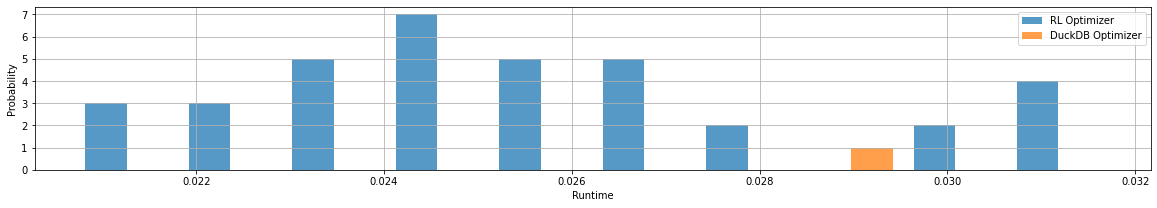

In [84]:
# style of hist
#bin_width = (df_rl['result'].max() -  df_rl['result'].min())/30
#bins = np.arange(df_rl['result'].min(), df_rl['result'].max(), bin_width).tolist()

# returns n, bins, patches
# plt.hist([df_rl['result'], df_duckdb['result']], bins, alpha=0.75, label=['RL Optimizer', 'DuckDB Optimizer'])
plt.hist([df_rl['result'], df_duckdb['result']], alpha=0.75, label=['RL Optimizer', 'DuckDB Optimizer'])

plt.xlabel('Runtime')
plt.ylabel('Probability')
plt.legend(loc='upper right')

plt.grid(True)
plt.show()